# Stock Market Performance Analysis

Stock market performance analysis can be used to inform investment decisions and help investors make informed decisions about buying or selling stocks.
Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.

In [25]:
#Importin all necessary Labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\philo\\Downloads\\stocks.csv")

In [3]:
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
data.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [5]:
data.shape

(248, 8)

In [6]:
data.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [9]:
data.isna()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
243,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False


In [10]:
data.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool

In [12]:
data.duplicated().sum()

0

In [14]:
!pip install yfinance pandas_datareader
#to collect real-time stock market data for the past three months.
# These libraries allow us to pull stock data easily.

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     -------------- ----------------------- 41.0/109.5 kB 81.9 kB/s eta 0:00:01
     -------------- ----------------------- 41.0/109.5 kB 81.9 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.5 kB 105.8 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.5 kB 154.3 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 181.4 kB/s eta 0:00:00


#Fetching historical data:

#yfinance makes it easy to get stock data. In the example below, we're fetching data for Apple Inc. (AAPL) for the past year.

In [16]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'AAPL'       ## Using Apple's stock symbol

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)   #yf.ticker is a  is a Python module that allows you to access ticker data in a more Pythonic way. You can use it to download market data from Yahoo! Finance’s API.

# Get the historical prices for this ticker
data = tickerData.history(period='1y')     ## Fetching data for 1 year

In [18]:
#Handling Missing values    #encounter missing values in stock data

data.dropna(inplace=True)      # # This removes any rows with missing values

In [19]:
#Ensure date format is correct:

data.index = pd.to_datetime(data.index)    ##function is used to convert the index of the dataframe to datetime format.

In [20]:
#Calculate daily returns:


data['Daily Return'] = data['Close'].pct_change()   

##The code you provided is used to calculate the percentage change between the current and a prior element in the ‘Close’ column of a pandas DataFrame. 
#The resulting percentage change is then stored in a new column called ‘Daily Return’

# Exploratory Data Analysis (EDA)

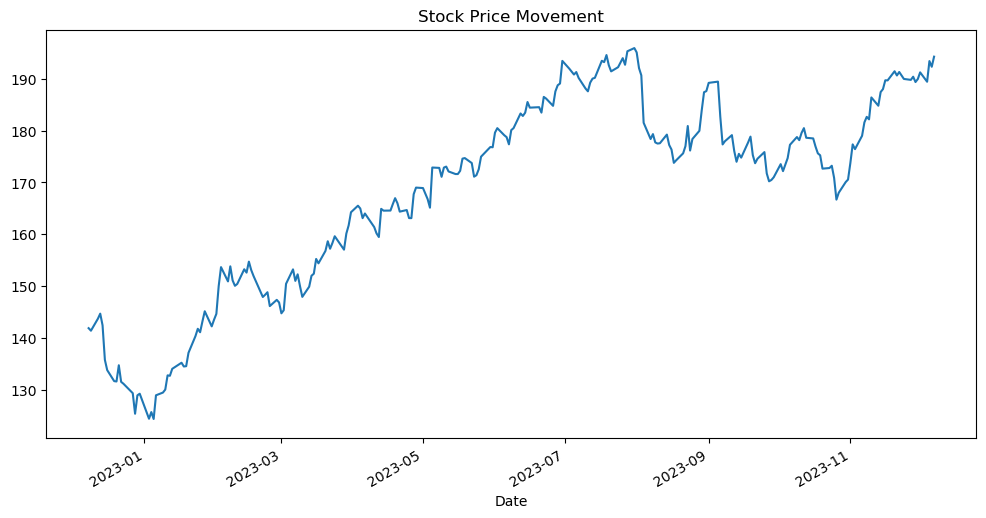

In [21]:
## line plot can show us how the stock's closing price has moved over time.

data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

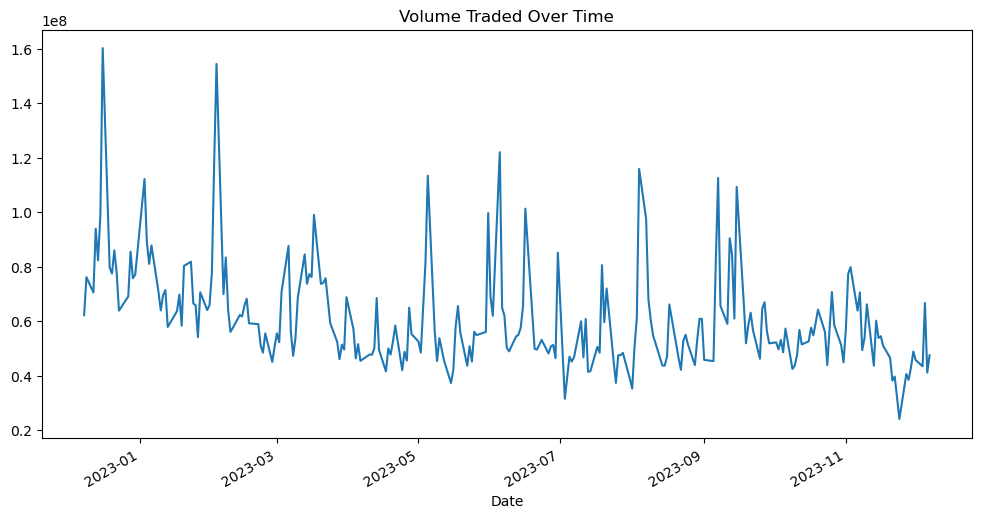

In [22]:
#Analyze volume of stocks traded:

#Volume indicates the number of shares traded in a given period.


data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

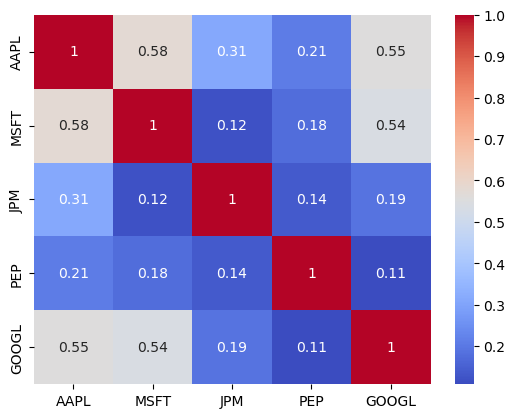

In [26]:
#Correlation between stocks:

#to see how they move in relation to one another. A heatmap can visualize this relationship.


stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Technical Analysis

#Technical analysis involves studying past market data, primarily price and volume, to forecast future price movements. 
#This analysis can be performed on any security with historical trading data.


#Moving Averages:

#A moving average smoothens price data to create a single flowing line, which makes it easier to identify the direction of the trend. The two most common types of moving averages are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).

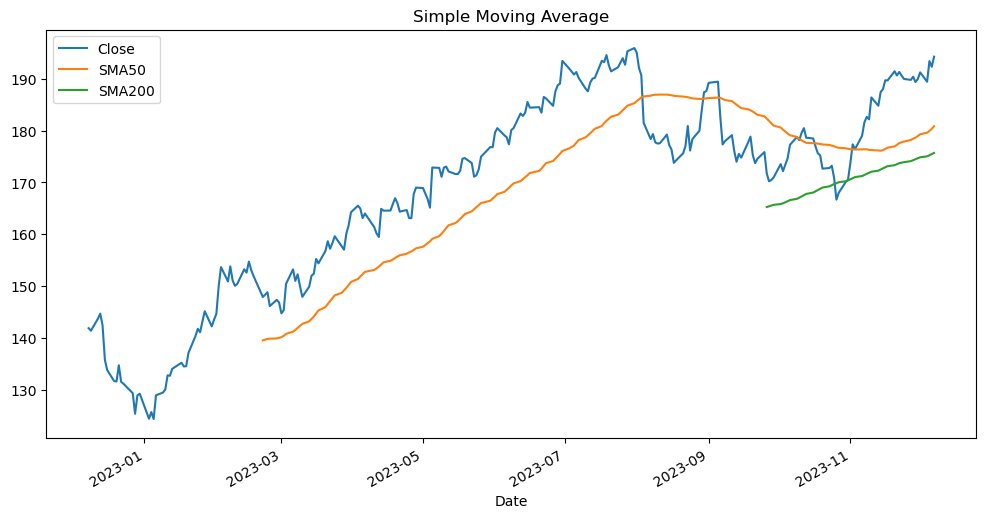

In [27]:
##Simple Moving Average (SMA):

data['SMA50'] = data['Close'].rolling(window=50).mean()       #Close price of a stock.  #window parameter specifies the number of data points to include in each window,
data['SMA200'] = data['Close'].rolling(window=200).mean()     # rolling used to calculate the moving average of the Close price over a specified window size.#mean function calculates the mean of the data points in each window.

data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

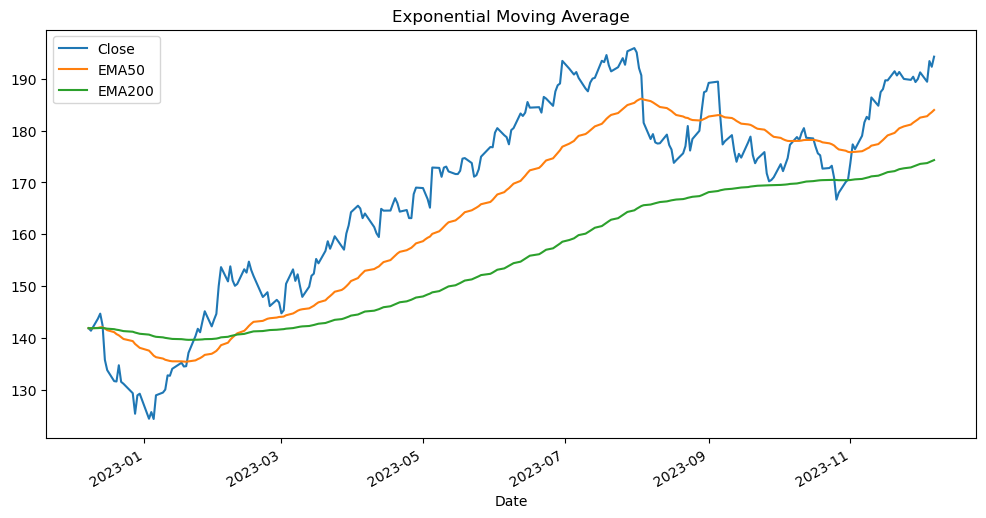

In [28]:
##Exponential Moving Average (EMA):

## that places a greater weight and significance on the most recent data points.
#It is commonly used in technical analysis to identify trends in stock prices and other financial instruments.


data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()

EMA gives more weight to recent prices, and therefore reacts more quickly to price changes than SMA

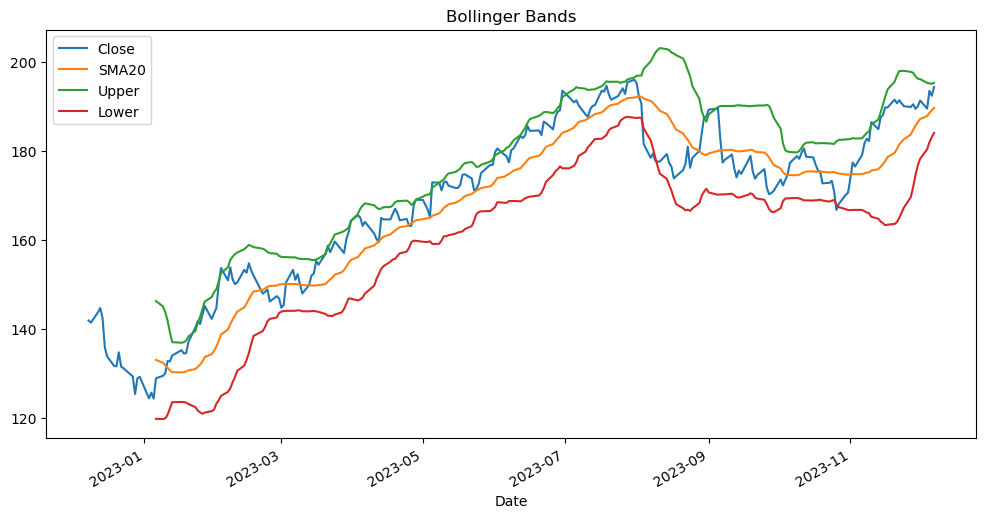

In [29]:
##Bollinger Bands:

#Bollinger Bands consist of a middle band being an N-period simple moving average (SMA), an upper band at K times 
#an N-period standard deviation above the middle band, and a lower band at K times an N-period 
#standard deviation below the middle band.

data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

Note: Bollinger Bands are used to determine overbought and oversold levels; when the price reaches the upper band, it might be overbought, and when it reaches the lower band, it might be oversold.

# Conclusion


Summarize the insights gathered from the analysis:


-Stock price trends over the past year.
-Technical indicators and their implications.
-Potential investment strategies based on historical data.
-Performance of the developed trading strategy.